<a href="https://colab.research.google.com/github/kogen15923/python-machine-learning-book-3rd-edition/blob/master/ch02_Training_Simple_Machine_Learning_Algorithms_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習の学習用コード（PyTorch & scikit-learn）

このリポジトリは以下の書籍を参考にして学習・実装したコードをまとめたものです。

参考書籍:  
Sebastian Raschka, Yuxi Liu 著  
『Python機械学習プログラミング 第3版 ― PyTorch & scikit-learnによる実践データ分析』  
（オライリー・ジャパン）

元のコード: https://github.com/rasbt/python-machine-learning-book-3rd-edition  
ライセンス: MIT License

# パーセプトロンの実装

In [2]:
# パーセプトロンの作成

import numpy as np

class Perceptron:
  # コンストラクタ
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    """
    <パラメータ>
    eta: 学習率 (float) (0.0 < eta <= 1.0)
    n_iter: エポック (int)
    random_state: 乱数シード (int)
    X: 訓練データ, shape = [n_samples, n_features]
    (n_samples: サンプル数, n_features: 特徴量数)
    y: 目的変数, shape = [n_samples]

    <属性>
    w_: 適合後の重み (1次元配列)
    b_: 適合後のバイアス (スカラー)
    errors_: エポックごとの誤分類数 (リスト)
    """
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  # モデルの学習
  def fit(self, X, y):
    # 乱数生成ジェネレーター
    rgen = np.random.RandomState(self.random_state)
    '''
    rgen.uniform(low, high, size): 指定した範囲で一様分布を生成
    rgen.randint(low, high, size): 指定した範囲でランダムな整数を生成
    rgen.rand(d0, d1, ...): 0以上1未満の一様分布を生成(=rgen.uniform(0, 1, ...))
    rgen.choice(a, size): 配列aの中からランダムに要素を選ぶ
    rgen.shuffle(x): 配列xの要素をシャッフル
    '''

    # loc(平均値):0.0, scale(標準偏差):0.01, size(乱数の個数):特徴量数
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float64(0.)
    self.errors_ = []

    for _ in range(self.n_iter):  # 訓練データの繰り返し処理(エポックの実現)
      errors = 0
      for xi, target in zip(X, y):  # 重みとバイアスユニットを更新
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)  # 誤差を追加
      self.errors_.append(errors)
    return self

  # 総入力を計算
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  # クラスラベルの予測
  def predict(self, X):
    # 1ステップ後のクラスラベルを返す
    return np.where(self.net_input(X) >= 0.0, 1, 0)

# パーセプトロンの実装テスト

In [3]:
# データの取得(Iris)

import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


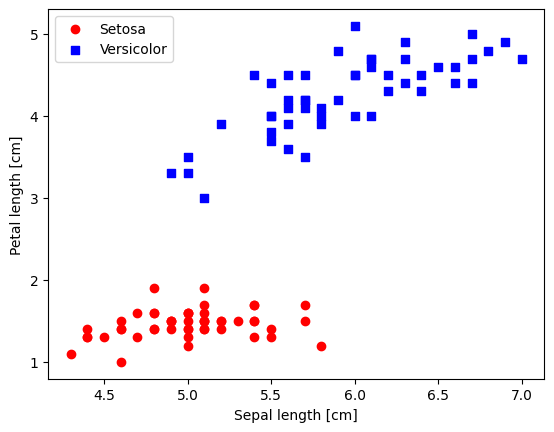

In [4]:
# 特徴量：萼片と花びらの長さ, ラベル：SetosaとVersicolorによる特徴量部分空間の表示

import matplotlib.pyplot as plt
import numpy as np

# 目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを0に、Iris-versicolorを1に変換
y = np.where(y == 'Iris-setosa', 0, 1)
# 1, 3列目の特徴量の抽出
X = df.iloc[0:100, [0, 2]].values

# Setosaを赤の丸
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
# Versicolorを青の四角
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
# 軸および凡例の設定
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# 図の表示
plt.show()

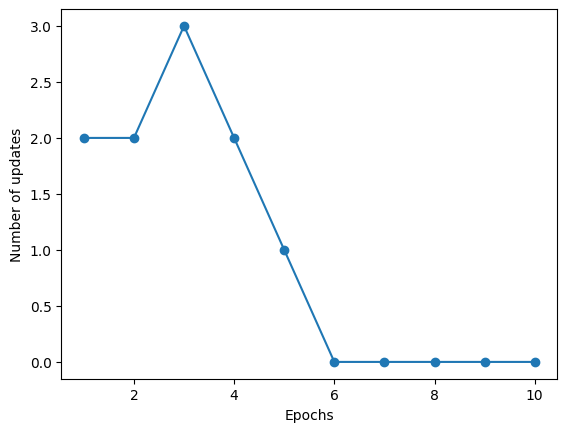

In [5]:
# エポック数対誤分類のプロット

# パーセプトロンをppnにインスタンス化
ppn = Perceptron(eta=0.1, n_iter=10)
# モデルを訓練データに適合
ppn.fit(X, y)

# エポック数対誤分類数グラフ
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [6]:
# 二次元データの決定境界の可視化

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # 目的変数を一意に指定

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')


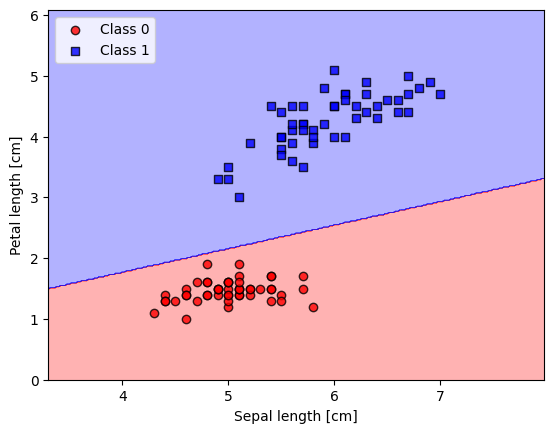

In [7]:
# 実際のプロット

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


# ADALINEの実装

In [8]:
# ADALINEの実装

class AdalineGD:
  '''
  <パラメータ>
  eta: 学習率 (float) (0.0 < eta <= 1.0)
  n_iter: エポック (int)
  random_state: 乱数シード (int)
  X: 訓練データ, shape = [n_samples, n_features]
  (n_samples: サンプル数, n_features: 特徴量数)
  y: 目的変数, shape = [n_samples]

  <属性>
  w_: 適合後の重み (1次元配列)
  b_: 適合後のバイアス (スカラー)
  losses_: エポックごとの誤差の総和 (リスト)
  '''
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.1, size=X.shape[1])
    self.b_ = np.float64(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

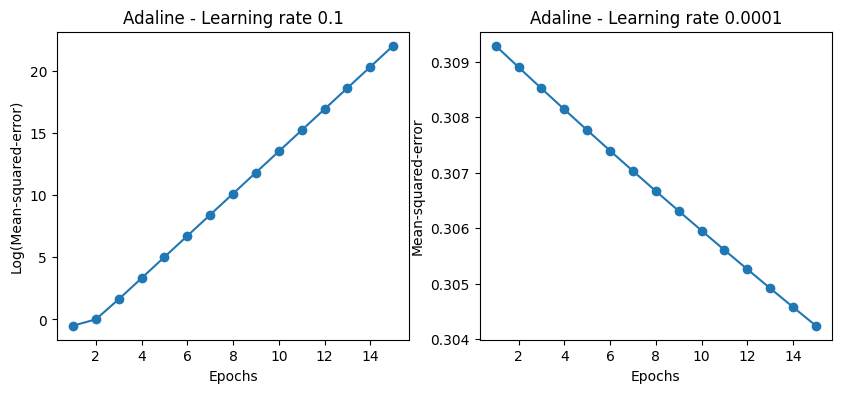

In [9]:
# 学習率別エポック数対損失関数の比較

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Mean-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

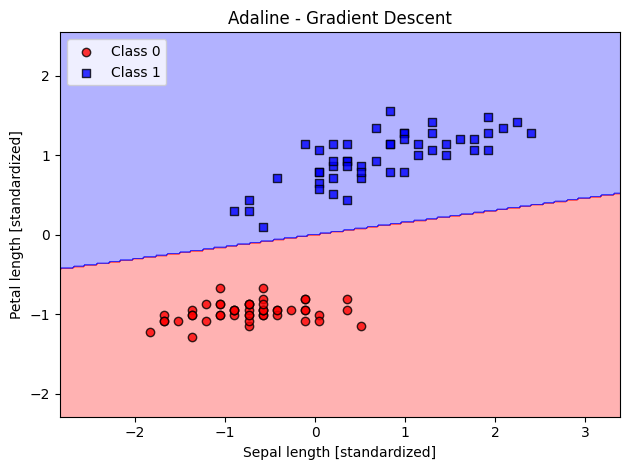

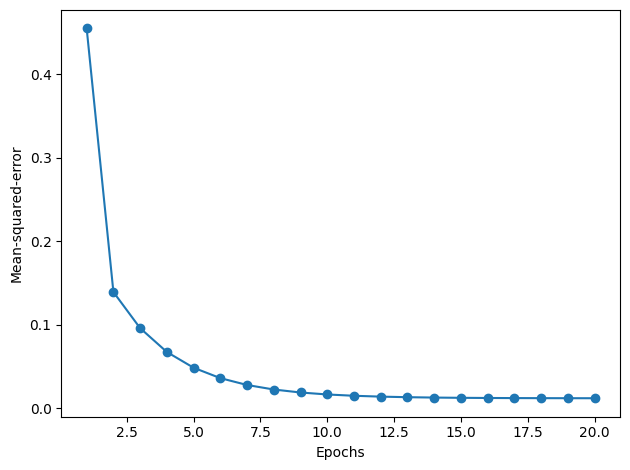

In [10]:
# 標準化及びADALINEの再訓練と収束確認
# 標準化
X_std = np.copy(X)

X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.tight_layout()
plt.show()

In [13]:
# 勾配降下法を用いたADALINEの実装

class AdalineSGD:
  '''
  <パラメータ>
  eta: 学習率 (float) (0.0 < eta <= 1.0)
  n_iter: エポック (int)
  shuffle: エポックごとに重みをシャッフルするか否か (bool)(デフォルト: True)
  random_state: 乱数シード (int)
  X: 訓練データ, shape = [n_samples, n_features]
  (n_samples: サンプル数, n_features: 特徴量数)
  y: 目的変数, shape = [n_samples]

  <属性>
  w_: 適合後の重み (1次元配列)
  b_: 適合後のバイアス (スカラー)
  losses_: エポックごとの誤差の総和 (リスト)
  '''
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.losses_ = []

    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
    self.b_ = np.float64(0.)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_ += self.eta * 2.0 * xi * (error)
    self.b_ += self.eta * 2.0 * error
    loss = error**2
    return loss

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

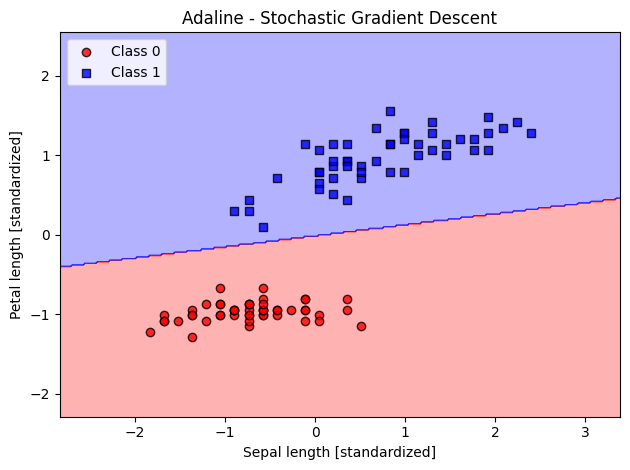

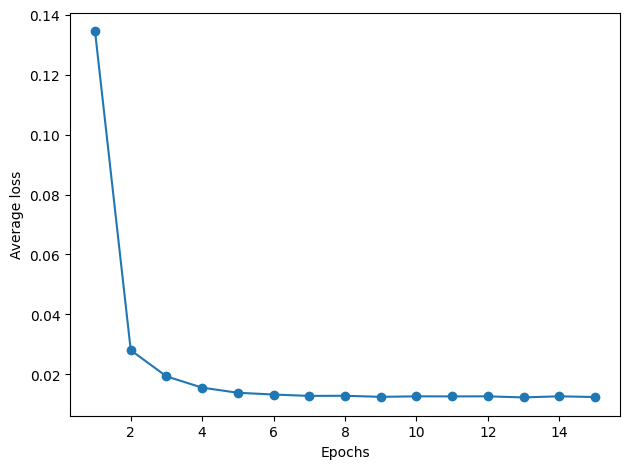

In [14]:
# もう一度訓練と収束確認

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()